## 1. Importation des Bibliothèques

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Chargement des Données

In [11]:
df = pd.read_csv("Employee.csv", sep = ",")
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [21]:
df = df.rename(columns = {'Education' : 'education',
                         'JoiningYear' : 'joining_year',
                         'City' : 'city',
                         'PaymentTier': 'payment_tier',
                         'Age': 'age',
                         'Gender': 'gender',
                         'EverBenched': 'ever_banched',
                         'ExperienceInCurrentDomain' : 'experience_in_current_domain',
                         'LeaveOrNot' : 'leave_or_not'})

In [22]:
df

,education,joining_year,city,payment_tier,age,gender,ever_banched,experience_in_current_domain,leave_or_not
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


## 3. Analyse Exploratoire des Données (EDA)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   education                     4653 non-null   object
 1   joining_year                  4653 non-null   int64 
 2   city                          4653 non-null   object
 3   payment_tier                  4653 non-null   int64 
 4   age                           4653 non-null   int64 
 5   gender                        4653 non-null   object
 6   ever_banched                  4653 non-null   object
 7   experience_in_current_domain  4653 non-null   int64 
 8   leave_or_not                  4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [44]:
df['education'] = df['education'].astype('category')
df['city'] = df['city'].astype('category')
df['gender'] = df['gender'].astype('category')
df['ever_banched'] = df['ever_banched'].astype('category')

In [25]:
df.duplicated().sum()

1889

In [37]:
df.drop_duplicates()

,education,joining_year,city,payment_tier,age,gender,ever_banched,experience_in_current_domain,leave_or_not
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,0
4647,Bachelors,2016,Pune,3,30,Male,No,2,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1


In [39]:
#vérification des valeurs manquantes
df.isnull().sum()

education                       0
joining_year                    0
city                            0
payment_tier                    0
age                             0
gender                          0
ever_banched                    0
experience_in_current_domain    0
leave_or_not                    0
dtype: int64

In [41]:
df.head()

,education,joining_year,city,payment_tier,age,gender,ever_banched,experience_in_current_domain,leave_or_not
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [45]:
df.describe()

,joining_year,payment_tier,age,experience_in_current_domain,leave_or_not
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


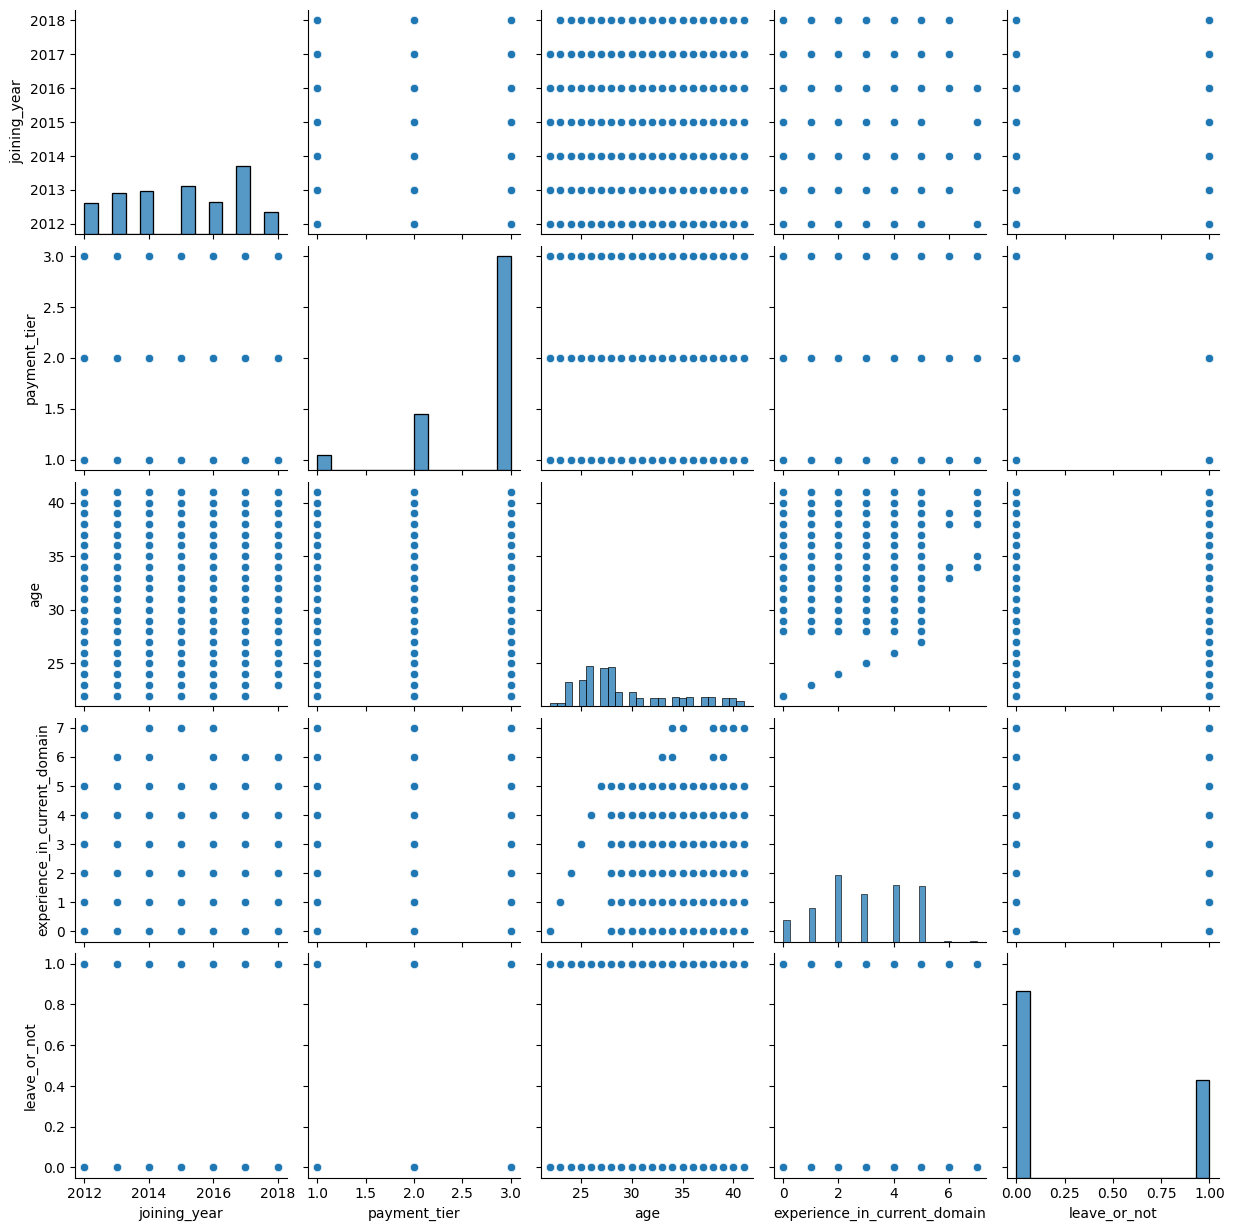

In [46]:
sns.pairplot(df)
plt.show()

**joining_year (Année d'embauche) :**
- Les années d'embauche vont de 2012 à 2018.
- Il semble y avoir une répartition des employés sur plusieurs années, ce qui pourrait indiquer une stabilité ou une croissance de l'entreprise.

**payment_tier (Niveau de rémunération) :**
- Les valeurs de payment_tier vont de 1.0 à 3.0.
- Il semble y avoir une concentration autour de 2.5 à 3.0, ce qui pourrait indiquer que la majorité des employés sont dans un niveau de rémunération élevé

**age (Âge des employés) :**
- L'âge des employés semble varier entre 25 et 40 ans.
- La majorité des employés semblent être dans la tranche d'âge 30-35 ans.

**experience_in_current_domain (Expérience dans le domaine actuel) :**
- L'expérience dans le domaine actuel varie de 0 à 7 ans.
- La majorité des employés semblent avoir une expérience de 2 à 5 ans.



## Objectif
- **Quelle est la répartition des diplômes parmi les salariés ?**
- **Comment la durée du service (année d’adhésion) varie-t-elle selon les villes ?**
- **Existe-t-il une corrélation entre le niveau de paiement et l’expérience dans le domaine actuel ?**
- **Quelle est la répartition des sexes au sein de la population active ?**
- **Existe-t-il des modèles de comportement en matière de congés parmi les employés ?**

## 1- Quelle est la répartition des diplômes parmi les salariés ?

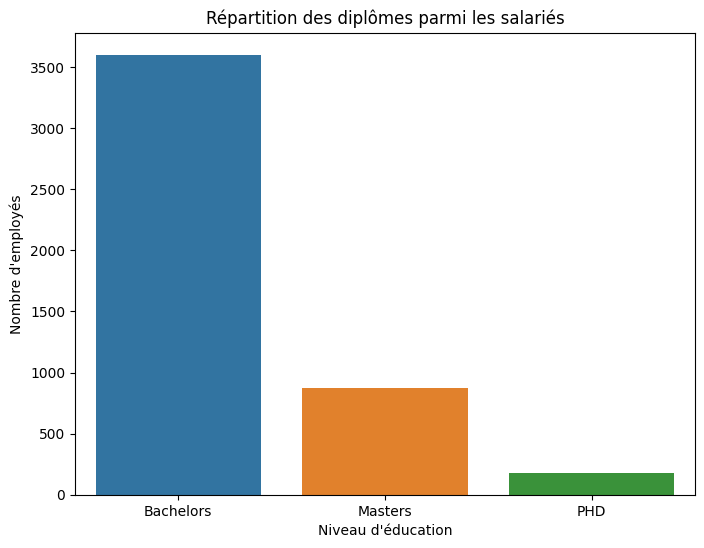

In [47]:
# Répartition des diplômes
education_distribution = df['education'].value_counts()

# Visualisation
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='education', order=education_distribution.index)
plt.title('Répartition des diplômes parmi les salariés')
plt.xlabel('Niveau d\'éducation')
plt.ylabel('Nombre d\'employés')
plt.show()

#### - **La répartition des diplômes parmi les salariés montre que la majorité des employés ont un diplôme de Bachelors.**

#### - **Il y a également une proportion significative d'employés avec un diplôme de Masters.**

#### - **Les employés avec un PhD sont moins nombreux.**

## 2- Comment la durée du service (année d’adhésion) varie-t-elle selon les villes ?

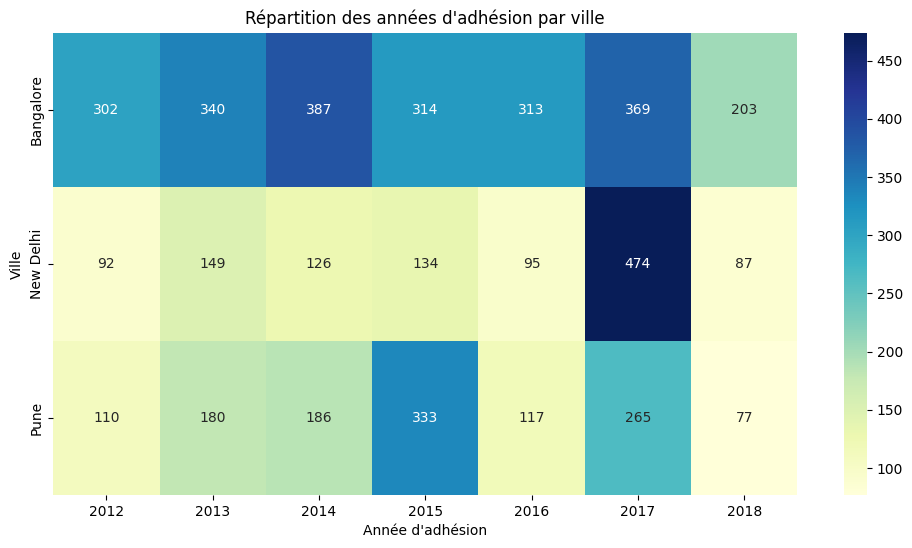

In [48]:
# Répartition des années d'adhésion par ville
city_joining_year = df.groupby(['city', 'joining_year']).size().unstack()

# Visualisation
plt.figure(figsize=(12, 6))
sns.heatmap(city_joining_year, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Répartition des années d\'adhésion par ville')
plt.xlabel('Année d\'adhésion')
plt.ylabel('Ville')
plt.show()

#### - **Bangalore a eu un nombre élevé de recrutements en 2014 et 2017.**

#### - **New Delhi a vu une augmentation significative en 2017.**

#### - **Pune a eu un pic de recrutements en 2015.**

## 3- Existe-t-il une corrélation entre le niveau de paiement et l’expérience dans le domaine actuel ?

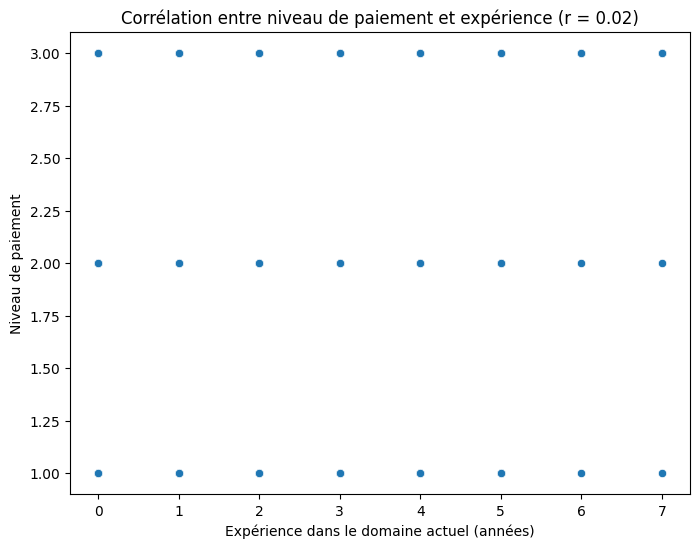

In [49]:
# Corrélation entre niveau de paiement et expérience
correlation = df['payment_tier'].corr(df['experience_in_current_domain'])

# Visualisation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='experience_in_current_domain', y='payment_tier')
plt.title(f'Corrélation entre niveau de paiement et expérience (r = {correlation:.2f})')
plt.xlabel('Expérience dans le domaine actuel (années)')
plt.ylabel('Niveau de paiement')
plt.show()

#### - **La corrélation entre le niveau de paiement (payment_tier) et l'expérience dans le domaine actuel (experience_in_current_domain) est très faible (r = 0.02).**


## 4- Quelle est la répartition des sexes au sein de la population active ?

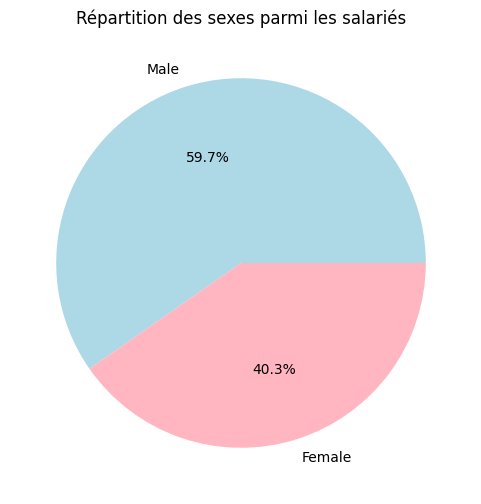

In [50]:
# Répartition des sexes
gender_distribution = df['gender'].value_counts()

# Visualisation
plt.figure(figsize=(6, 6))
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightpink'])
plt.title('Répartition des sexes parmi les salariés')
plt.ylabel('')
plt.show()

#### - **La répartition des sexes montre que 59.7% des employés sont des hommes et 40.3% sont des femmes.**

## 5- Existe-t-il des modèles de comportement en matière de congés parmi les employés ?

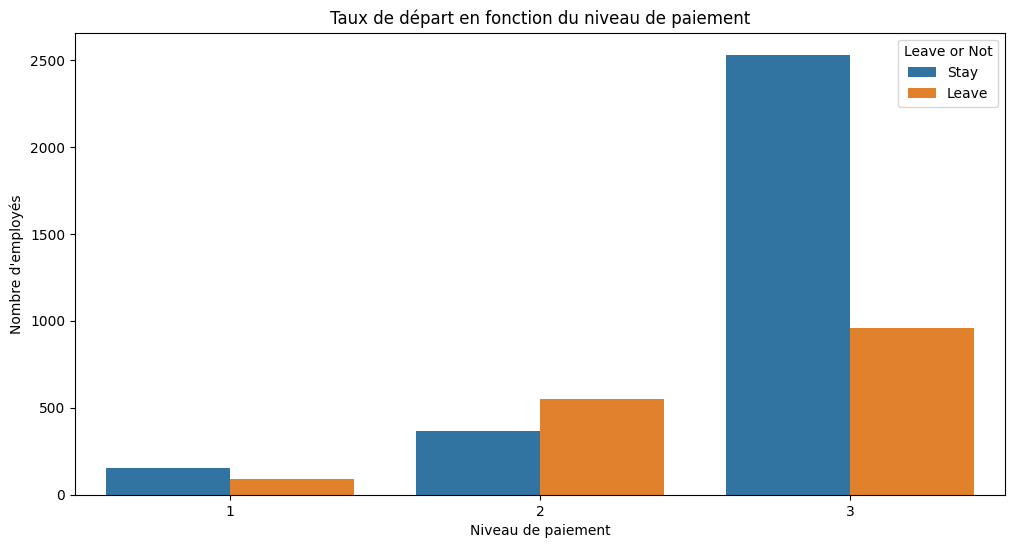

In [51]:
# Taux de départ en fonction de différentes variables
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='payment_tier', hue='leave_or_not')
plt.title('Taux de départ en fonction du niveau de paiement')
plt.xlabel('Niveau de paiement')
plt.ylabel('Nombre d\'employés')
plt.legend(title='Leave or Not', labels=['Stay', 'Leave'])
plt.show()

#### - **Les employés avec un niveau de paiement 1 ont un taux de départ plus élevé.**

#### - **Les employés avec un niveau de paiement 3 ont tendance à rester plus longtemps.**


# Conclusion

### - L'entreprise attire principalement des employés avec un niveau d'éducation de type Bachelors ou Masters, ce qui pourrait refléter les exigences des postes ou les préférences de recrutement.

### - Certaines villes comme Bangalore et Pune ont des tendances de recrutement plus marquées certaines années, ce qui pourrait indiquer des expansions ou des projets spécifiques dans ces régions.

### - Il n'y a pratiquement aucune corrélation entre l'expérience dans le domaine actuel et le niveau de paiement. Cela suggère que l'expérience dans le domaine n'est pas un facteur déterminant pour le niveau de rémunération dans cette entreprise.

### - Il y a une légère dominance masculine dans la population active de l'entreprise. Cela pourrait indiquer un déséquilibre de genre, bien que la proportion de femmes soit tout de même significative.

### - Les employés avec un niveau de rémunération plus bas sont plus susceptibles de quitter l'entreprise, ce qui pourrait indiquer une insatisfaction liée à la rémunération ou à d'autres facteurs associés.